# Desafio **Indicium** ‚Äì Cientista de Dados  ‚Äì An√°lise Cinematogr√°fica


# Entregas 
1. Fa√ßa uma an√°lise explorat√≥ria dos dados (EDA), demonstrando as principais caracter√≠sticas entre as vari√°veis e apresentando algumas hip√≥teses relacionadas. Seja criativo!

2. Responda tamb√©m √†s seguintes perguntas:
   1. Qual filme voc√™ recomendaria para uma pessoa que voc√™ n√£o conhece?
   2. Quais s√£o os principais fatores que est√£o relacionados com alta expectativa de faturamento de um filme?
   3. Quais insights podem ser tirados com a coluna *Overview?* √â poss√≠vel inferir o g√™nero do filme a partir dessa coluna?
3. Explique como voc√™ faria a previs√£o da **nota do imdb** a partir dos dados. Quais vari√°veis e/ou suas transforma√ß√µes voc√™ utilizou e por qu√™? Qual tipo de problema estamos resolvendo (regress√£o, classifica√ß√£o)? Qual modelo melhor se aproxima dos dados e quais seus pr√≥s e contras? Qual medida de performance do modelo foi escolhida e por qu√™?
4. Supondo um filme com as seguintes caracter√≠sticas:

   {'Series\_Title': 'The Shawshank Redemption',
   'Released\_Year': '1994',
   'Certificate': 'A',
   'Runtime': '142 min',
   'Genre': 'Drama',
   'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
   'Meta\_score': 80.0,
   'Director': 'Frank Darabont',
   'Star1': 'Tim Robbins',
   'Star2': 'Morgan Freeman',
   'Star3': 'Bob Gunton',
   'Star4': 'William Sadler',
   'No\_of\_Votes': 2343110,
   'Gross': '28,341,469'}

Qual seria a nota do IMDB?

5. Salve o modelo desenvolvido no formato .pkl.
6. A entrega deve ser feita atrav√©s de um reposit√≥rio de c√≥digo p√∫blico que contenha:
   1. README explicando como instalar e executar o projeto
   2. Arquivo de requisitos com todos os pacotes utilizados e suas vers√µes
   3. Relat√≥rios das an√°lises estat√≠sticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2\.
   4. C√≥digos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
   5. Arquivo .pkl conforme passo 5 acima.

Todos os c√≥digos produzidos devem seguir as boas pr√°ticas de codifica√ß√£o.

---
# Respostas
---


## Entrega 1. An√°lise Explorat√≥ria de Dados (EDA)

A an√°lise explorat√≥ria dos dados (EDA) foi realizada para compreender as principais caracter√≠sticas do dataset e identificar padr√µes, rela√ß√µes e hip√≥teses para an√°lises futuras ou modelagem preditiva.


### 1.0 An√°lise Univariada
- Avalia√ß√£o individual de cada vari√°vel para entender distribui√ß√£o, presen√ßa de valores ausentes e outliers.
- Principais a√ß√µes:
  - Identifica√ß√£o de **valores ausentes** e propor√ß√£o de NAs.
  - Contagem de **valores √∫nicos** e frequ√™ncia das categorias.
  - Determina√ß√£o da **moda** para vari√°veis categ√≥ricas.
  - An√°lise de **m√©dia, mediana, skew e kurtosis** para vari√°veis num√©ricas.
- **Insight:** Nenhum diretor ou ator domina significativamente, indicando **alta diversidade/baixa concentra√ß√£o**.


### 1.1 An√°lise Bivariada
- Explora√ß√£o das rela√ß√µes entre pares de vari√°veis.
- Principais t√©cnicas:
  - **Num√©rica x Num√©rica:** scatter plot e correla√ß√£o (ex.: Gross x IMDB_Rating).
  - **Num√©rica x Categ√≥rica:** boxplots ou ANOVA (ex.: IMDB_Rating por Certificate ou Genre).
  - **Categ√≥rica x Categ√≥rica:** tabelas de conting√™ncia e teste Qui-quadrado (ex.: elenco/diretor x faixas de IMDB_Rating).
- **Insight:** Alguns diretores e atores est√£o associados a notas m√©dias mais altas; Gross apresenta correla√ß√£o positiva com IMDB_Rating.


### 1.2 An√°lise Multivariada
- Avalia√ß√£o de m√∫ltiplas vari√°veis simultaneamente para capturar intera√ß√µes complexas.
- Principais t√©cnicas:
  - **Regress√£o m√∫ltipla** de IMDB_Rating considerando Gross, Runtime e Meta_score.
  - **Pairplots e heatmaps** para visualizar depend√™ncias entre vari√°veis.
  - An√°lise de intera√ß√µes entre elenco, g√™nero e m√©tricas num√©ricas.
- **Insight:** Agrupamentos hist√≥ricos (m√©dia de Gross ou nota por ator/diretor) podem gerar preditores robustos, sem causar data leakage.


### 1.3 Hip√≥teses geradas
- H_1: Existe associa√ß√£o entre elenco/diretores e filmes com notas mais altas.
- H_2: Vari√°veis financeiras, como Gross, t√™m correla√ß√£o positiva com IMDB_Rating.
- H_3: Certas categorias de Genre ou Certificate podem influenciar a nota m√©dia.
- H_4: Estat√≠sticas agregadas por hist√≥rico de atores/diretores podem ser boas preditoras.

---

## 2. Entrega 2

### 2.1 Sistema de Recomenda√ß√£o

Podemos construir um sistema de recomenda√ß√£o a partir da concatena√ß√£o de todas as vari√°veis textuais dispon√≠veis. A partir dessa vari√°vel consolidada, existem duas abordagens principais para representa√ß√£o dos textos:

1. **Embeddings**  
   - Capturam a sem√¢ntica dos textos.  
   - Permitem identificar proximidade de significado, mesmo quando palavras diferentes s√£o utilizadas.  

2. **Vetoriza√ß√£o esparsa (TF-IDF)**  
   - Captura a relev√¢ncia de termos com base em sua frequ√™ncia.  
   - √â mais eficaz para identificar correspond√™ncia exata de palavras.  
   - Requer pr√©-processamento, como:  
     - remo√ß√£o de *stopwords*  
     - normaliza√ß√£o  
     - lematiza√ß√£o (opcional)  

Em ambos os casos, podemos calcular a similaridade entre dois filmes por meio do **cosseno do √¢ngulo entre seus vetores** (*cosine similarity*).  
- Valores pr√≥ximos de **1** indicam alta similaridade.  
- Valores pr√≥ximos de **0** indicam aus√™ncia de rela√ß√£o (vetores ortogonais).  

Dessa forma, ao receber o t√≠tulo de um filme que o usu√°rio j√° assistiu (desde que presente na base), √© poss√≠vel recomendar os **Top-5 filmes mais similares** de acordo com sua representa√ß√£o vetorial.


### 2.2 Hip√≥tese de Expectativa de Faturamento

Com base nas an√°lises explorat√≥rias (correla√ß√µes e testes de associa√ß√£o), identificamos alguns fatores relacionados √† **alta expectativa de faturamento de um filme**:

- **N√∫mero de votos (No_of_Votes)**: apresentou correla√ß√£o moderada e positiva (~0,6) com o faturamento.  
- **Avalia√ß√£o IMDB (IMDB_Rating)**: possui rela√ß√£o positiva com o n√∫mero de votos, o que indiretamente refor√ßa sua conex√£o com o faturamento.  
- **Vari√°veis categ√≥ricas** como **Certificate, Genre, Diretor e Elenco** mostraram associa√ß√£o significativa (n√≠vel de 5%) com faixas de faturamento.  

Assim, formulamos a hip√≥tese:

**H‚ÇÅ:** Filmes com maior n√∫mero de votos, avalia√ß√µes mais altas e pertencentes a determinados g√™neros ou certificados t√™m maior probabilidade de alcan√ßar faturamento elevado.

### 2.3. Insights a partir da coluna *Overview*

A coluna *Overview* cont√©m descri√ß√µes textuais dos filmes. Em tese, ela pode ser explorada para extrair informa√ß√µes sobre enredo, tem√°tica e estilo narrativo. Surge ent√£o a seguinte hip√≥tese:

**H‚ÇÉ (pendente):** √â poss√≠vel inferir o g√™nero do filme a partir da coluna *Overview*.  

No entanto, na an√°lise preliminar, n√£o encontramos um *match* direto entre o texto do *Overview* e o g√™nero declarado (*Genre*).  
Com apenas 1000 observa√ß√µes dispon√≠veis, t√©cnicas cl√°ssicas de bag-of-words podem n√£o capturar as nuances sem√¢nticas necess√°rias.  

Duas abordagens mais promissoras seriam:  
- **Modelos pr√©-treinados de linguagem (ex.: BERT com *fine-tuning*)**, que captam rela√ß√µes sem√¢nticas profundas.  
- **Modelos de IA generativa**, que podem interpretar contexto narrativo para mapear em g√™neros.  

Portanto, esta hip√≥tese permanece em aberto e ser√° explorada em etapas futuras.

---

### 3. Previs√£o da Nota do IMDB

**Tipo de problema:**  
Estamos lidando com um problema de **regress√£o supervisionada**, pois a vari√°vel-alvo (*IMDB_Rating*) √© num√©rica e cont√≠nua.

**Vari√°veis consideradas:**  
- **Num√©ricas:**  
  - `Gross`, `No_of_Votes`, `Meta_score`, `Runtime`.  
  Essas vari√°veis s√£o bons preditores porque apresentam correla√ß√£o positiva (embora n√£o perfeita) com a nota.  
  Transforma√ß√µes como *log(Gross)* podem ser aplicadas para reduzir a assimetria.  

- **Categ√≥ricas:**  
  - `Genre`, `Certificate`, `Director`, `Stars`.  
  Necessitam de *encoding*. Por exemplo:  
  - *Top-k encoding* para `Director` e `Stars` (para reduzir dimensionalidade).  
  - *One-hot encoding* ou *target encoding* para `Genre` e `Certificate`.  

- **Textuais:**  
  - `Overview`. Pode ser vetorizado via TF-IDF ou embeddings (BERT, por exemplo), mas dada a limita√ß√£o de dados, come√ßaria com TF-IDF para capturar frequ√™ncia de termos relevantes.  

**Por que n√£o regress√£o linear simples?**  
- Regress√£o linear exige rela√ß√£o linear entre as vari√°veis independentes e o alvo, al√©m de normalidade dos res√≠duos e aus√™ncia de multicolinearidade.  
- Nossos dados n√£o cumprem essas premissas: temos vari√°veis categ√≥ricas de alta cardinalidade, vari√°veis num√©ricas assim√©tricas e rela√ß√µes n√£o lineares.  

**Modelos candidatos:**  
- **√Årvores de decis√£o / Random Forest:**  
  - **Pr√≥s:** Lidam bem com vari√°veis categ√≥ricas (ap√≥s encoding simples), n√£o exigem normaliza√ß√£o, capturam intera√ß√µes n√£o lineares.  
  - **Contras:** Podem sobreajustar; menos interpret√°veis.  

- **Gradient Boosting (ex.: XGBoost, LightGBM):**  
  - **Pr√≥s:** Melhor performance preditiva em geral, robusto para diferentes tipos de dados, captura bem rela√ß√µes complexas.  
  - **Contras:** Mais lento para treinar, mais dif√≠cil de interpretar.  

- **Modelos lineares regulares (Ridge, Lasso):**  
  - **Pr√≥s:** Boa interpretabilidade, podem servir como baseline.  
  - **Contras:** N√£o capturam n√£o-linearidades de forma adequada.  

**Medida de performance escolhida:**  
- **RMSE (Root Mean Squared Error):** penaliza mais erros grandes, √∫til pois queremos evitar previs√µes muito distantes da nota real.  
- **R¬≤:** mede a propor√ß√£o da vari√¢ncia explicada, √∫til para comunicar a qualidade geral do ajuste.  

**Conclus√£o preliminar:**  
O modelo que melhor se adapta ao problema √© um **ensemble baseado em boosting (como Gradient Boosting ou LightGBM)**, pois equilibra vi√©s e vari√¢ncia e lida bem com dados heterog√™neos. A regress√£o linear pode ser usada como baseline, mas n√£o √© adequada como modelo final.

# Imports

In [1]:
import sys
from pathlib import Path
project_root = Path.cwd().parent       
sys.path.append(str(project_root / "src"))      
from functions import *  # Vide src/functions.py 

# Lendo CSV principal

In [3]:
# Dados do desafio 
raw_df = pd.read_csv(DATA_DIR / "desafio_indicium_imdb.csv").drop(columns= ["Unnamed: 0"], errors= "ignore")


In [14]:
# Dados externos 
raw_df_tmdb = pd.read_csv(DATA_DIR / "tmdb-movies.csv").drop(columns= ["Unnamed: 0"], errors= "ignore")
raw_df_ext= pd.read_csv(DATA_DIR / "imdb-movies-dataset.csv").drop(columns= ["Unnamed: 0"], errors= "ignore")

In [11]:
len(set(raw_df_ext['Director']) - set(raw_df_tmdb['director'])) 

2418

In [3]:
raw_df.head(2)

Series_Title Released_Year Certificate  Runtime                 Genre  \
0    The Godfather          1972           A  175 min          Crime, Drama   
1  The Dark Knight          2008          UA  152 min  Action, Crime, Drama   

   IMDB_Rating                                           Overview  Meta_score  \
0          9.2  An organized crime dynasty's aging patriarch t...       100.0   
1          9.0  When the menace known as the Joker wreaks havo...        84.0   

               Director           Star1         Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando     Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale  Heath Ledger  Aaron Eckhart   

           Star4  No_of_Votes        Gross  
0   Diane Keaton      1620367  134,966,411  
1  Michael Caine      2303232  534,858,444

In [ ]:
raw_df_tmdb.head(2)


id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.  ...   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

Vamos enriquecer os dados internos adicionando vari√°veis externas como popularity, budget, tagline, vote_average e tamb√©m revenue. Essas informa√ß√µes s√£o relevantes porque ajudam a capturar diferentes dimens√µes do filme: engajamento do p√∫blico (popularity), escala de produ√ß√£o (budget), posicionamento de marketing (tagline), percep√ß√£o da audi√™ncia (vote_average) e resultado financeiro (revenue).

In [14]:
raw_df_tmdb =raw_df_tmdb [['director','popularity','budget','vote_average','revenue']].rename(columns= {'director':'Director'})


In [ ]:
normalize =  lambda text: str(text.lower().strip())
raw_df_tmdb['Director'] = raw_df_tmdb['Director'].astype(str).apply(normalize)
raw_df['Director'] = raw_df['Director'].astype(str).apply(normalize)




In [56]:
from rapidfuzz import process, distance

def map_director(name):
    small_directors = list(raw_df['Director'])
    if name in small_directors:
        return name
    else:
        match, score, _ = process.extractOne(
            query=name,
            choices=small_directors,
            scorer=distance.Levenshtein.distance  # dist√¢ncia de edi√ß√£o correta
        )
        if score <= 4:
            return match
        else:
            return None


In [57]:
raw_df_tmdb['match_director'] = raw_df_tmdb['Director'].apply(map_director)

In [58]:
raw_df_tmdb = raw_df_tmdb.dropna(subset = ['match_director']).reset_index(drop=True)

In [59]:
len(set(raw_df_tmdb['match_director']))

392

In [ ]:
merged = raw_df.merge(raw_df_tmdb, on='Director', how='left').reset_index(drop=True)

In [38]:
merged = merged.dropna(subset=['popularity','budget','vote_average','revenue']).reset_index(drop=True)

In [ ]:
merged

Series_Title Released_Year Certificate  Runtime  \
0     The Godfather          1972           A  175 min   
1     The Godfather          1972           A  175 min   
2     The Godfather          1972           A  175 min   
3     The Godfather          1972           A  175 min   
4     The Godfather          1972           A  175 min   
...             ...           ...         ...      ...   
6096   The 39 Steps          1935         NaN   86 min   
6097   The 39 Steps          1935         NaN   86 min   
6098   The 39 Steps          1935         NaN   86 min   
6099   The 39 Steps          1935         NaN   86 min   
6100   The 39 Steps          1935         NaN   86 min   

                         Genre  IMDB_Rating  \
0                 Crime, Drama          9.2   
1                 Crime, Drama          9.2   
2                 Crime, Drama          9.2   
3                 Crime, Drama          9.2   
4                 Crime, Drama          9.2   
...                        ...          ...   
6096  Crime, Mystery, Thriller          7.6   
6097  Crime, Mystery, Thriller          7.6   
6098  Crime, Mystery, Thriller          7.6   
6099  Crime, Mystery, Thriller          7.6   
6100  Crime, Mystery, Thriller          7.6   

                                               Overview  Meta_score  \
0     An organized crime dynasty's aging patriarch t...       100.0   
1     An organized crime dynasty's aging patriarch t...       100.0   
2     An organized crime dynasty's aging patriarch t...       100.0   
3     An organized crime dynasty's aging patriarch t...       100.0   
4     An organized crime dynasty's aging patriarch t...       100.0   
...                                                 ...         ...   
6096  A man in London tries to help a counter-espion...        93.0   
6097  A man in London tries to help a counter-espion...        93.0   
6098  A man in London tries to help a counter-espion...        93.0   
6099  A man in London tries to help a counter-espion...        93.0   
6100  A man in London tries to help a counter-espion...        93.0   

                  Director          Star1              Star2           Star3  \
0     francis ford coppola  Marlon Brando          Al Pacino      James Caan   
1     francis ford coppola  Marlon Brando          Al Pacino      James Caan   
2     francis ford coppola  Marlon Brando          Al Pacino      James Caan   
3     francis ford coppola  Marlon Brando          Al Pacino      James Caan   
4     francis ford coppola  Marlon Brando          Al Pacino      James Caan   
...                    ...            ...                ...             ...   
6096      alfred hitchcock   Robert Donat  Madeleine Carroll  Lucie Mannheim   
6097      alfred hitchcock   Robert Donat  Madeleine Carroll  Lucie Mannheim   
6098      alfred hitchcock   Robert Donat  Madeleine Carroll  Lucie Mannheim   
6099      alfred hitchcock   Robert Donat  Madeleine Carroll  Lucie Mannheim   
6100      alfred hitchcock   Robert Donat  Madeleine Carroll  Lucie Mannheim   

               Star4  No_of_Votes        Gross  popularity      budget  \
0       Diane Keaton      1620367  134,966,411    0.414910  15000000.0   
1       Diane Keaton      1620367  134,966,411    0.362217   7000000.0   
2       Diane Keaton      1620367  134,966,411    1.008461  40000000.0   
3       Diane Keaton      1620367  134,966,411    5.738034   6000000.0   
4       Diane Keaton      1620367  134,966,411    0.281136         0.0   
...              ...          ...          ...         ...         ...   
6096  Godfrey Tearle        51853          NaN    2.610362    806948.0   
6097  Godfrey Tearle        51853          NaN    0.600495   2000000.0   
6098  Godfrey Tearle        51853          NaN    1.139321   2500000.0   
6099  Godfrey Tearle        51853          NaN    0.567962   4000000.0   
6100  Godfrey Tearle        51853          NaN    0.402730   3000000.0   

      vote_average      revenue  
0       

In [ ]:
#Checando diferen√ßa 
directors_raw = set(raw_df['Director'])

directors_merged = set(merged['Director'])

missing_directors = directors_raw - directors_merged
print(missing_directors)
len(missing_directors)

{'asghar farhadi', 'clyde bruckman', 'mamoru hosoda', 'sh√ªsuke kaneko', 'alejandro amen√°bar', 'aniruddha roy chowdhury', 'rahi anil barve', 'hannes holm', 'paolo genovese', 'elem klimov', 'raja menon', 'neeraj pandey', 'sriram raghavan', 'carl theodor dreyer', 'hong-jin na', 'deniz gamze erg√ºven', 'anthony russo', 'f.w. murnau', 'leo mccarey', 'jordan peele', 'abhishek chaubey', 'katsuhiro √¥tomo', 'victor fleming', 'james frawley', 'raoul walsh', 'daniel monz√≥n', 'dami√°n szifron', 'bong joon ho', 'kaige chen', 'darius marder', 'nishikant kamat', 'thomas jahn', 'cristian mungiu', 'mamoru oshii', 'travis knight', 'krzysztof kieslowski', 'tetsuya nakashima', 'byron howard', 'jae-young kwak', 'vikramaditya motwane', 'jemaine clement', 'georges franju', 'bob persichetti', 'shoojit sircar', 'jean-marc vall√©e', 'vincent paronnaud', 'henri-georges clouzot', 'bradley cooper', 'jonathan dayton', 'mikael h√•fstr√∂m', 'tigmanshu dhulia', 'vishal bhardwaj', 'yilmaz erdogan', 'imtiaz ali', 'd

185

In [46]:
print(len((set(raw_df_tmdb['Director']))))

5067


In [10]:
raw_df_tmdb['overview'][0]

'Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.'

# Informa√ß√µes Gerais do Dataset

In [35]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


# Padroniza√ß√µes Globais (Sem Data Leakage)

## Convertendo Released_Year, Gross e Runtime para num√©rico


In [4]:
# =========================================
# Convertendo Released_Year, Gross e Runtime para num√©rico
# =========================================

raw_df['Released_Year'] = pd.to_numeric(raw_df['Released_Year'].str.strip(), errors='coerce').astype('Int64')

# Gross para float 
raw_df['Gross'] = (
    raw_df['Gross']
    .str.replace(r'[^0-9.]', '', regex=True)  
    .replace('', pd.NA)                        
    .astype('float')
)

# Runtime para minutos como inteiro (assumindo formato "123 min")
raw_df['Runtime'] = (
    raw_df['Runtime']
    .str.extract(r'(\d+)')  
    .astype('Int64')         # converte para inteiro com suporte a NaN
)


## Convers√£o de Colunas N√£o Num√©ricas para String

In [5]:
for col in raw_df.select_dtypes(include=['object']).columns:
    raw_df[col] = raw_df[col].astype('string')

## Criando uma nova coluna: Faixa de IMDB_Rating

> A cria√ß√£o desta coluna ser√° √∫til para analisar a associa√ß√£o entre vari√°veis **qualitativas** (como elenco e diretores) e o **target**, transformado de cont√≠nuo para categ√≥rico.  
> A hip√≥tese √© que **exista uma associa√ß√£o significativa** entre certos diretores ou atores e filmes com IMDB_Rating mais alto, podendo ser avaliada via **teste Qui-quadrado**.


In [6]:
# Definindo bins e labels
#bins = [0, 5, 6, 7, 8, 9, 10]  # ajustar conforme a distribui√ß√£o desejada
#labels = ['Muito Baixo', 'Baixo', 'M√©dio', 'Alto', 'Muito Alto', 'Excelente']
#Abordabem via quantiles
quantiles = raw_df['IMDB_Rating'].quantile([0, 0.25, 0.5, 0.75, 1])
labels     =  ['Baixa','M√©dia-baixa','M√©dia-alta','Alta'] 
raw_df['IMDB_Rating_Faixa'] = pd.cut(raw_df['IMDB_Rating'], bins=quantiles, labels=labels, include_lowest=True)

raw_df[['IMDB_Rating', 'IMDB_Rating_Faixa']].head()

IMDB_Rating IMDB_Rating_Faixa
0          9.2              Alta
1          9.0              Alta
2          9.0              Alta
3          9.0              Alta
4          8.9              Alta

In [7]:
raw_df[['IMDB_Rating', 'IMDB_Rating_Faixa']].sample(10)

IMDB_Rating IMDB_Rating_Faixa
502          7.9       M√©dia-baixa
433          8.0        M√©dia-alta
972          7.6             Baixa
761          7.7             Baixa
532          7.9       M√©dia-baixa
149          8.2              Alta
422          8.0        M√©dia-alta
596          7.8       M√©dia-baixa
929          7.6             Baixa
973          7.6             Baixa

In [8]:
raw_df['IMDB_Rating_Faixa'].value_counts()

IMDB_Rating_Faixa
Baixa          280
M√©dia-alta     268
M√©dia-baixa    257
Alta           194
Name: count, dtype: int64

## Criando uma nova coluna: Faixa de Gross 

In [9]:
print(raw_df['Gross'].min(), raw_df['Gross'].max())

# Criar quartis
quartiles_gross = raw_df['Gross'].quantile([0, 0.25, 0.5, 0.75, 1])

labels = ['Baixo', 'M√©dio', 'Alto', 'Muito Alto']

raw_df['Gross_Faixa'] = pd.cut(
    raw_df['Gross'],
    bins=quartiles_gross,
    labels=labels,
    include_lowest=True
)

raw_df[['Gross', 'Gross_Faixa']].dropna().sample(10)


1305.0 936662225.0


Gross Gross_Faixa
527   40084041.0        Alto
804   22858926.0       M√©dio
865      52709.0       Baixo
260     600200.0       Baixo
251   17498804.0       M√©dio
954   36400491.0        Alto
341  216428042.0  Muito Alto
723  176040665.0  Muito Alto
393     515905.0       Baixo
163   67436818.0        Alto

In [10]:
raw_df['Gross_Faixa'].value_counts()

Gross_Faixa
Baixo         208
Muito Alto    208
M√©dio         207
Alto          207
Name: count, dtype: int64

In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Series_Title       999 non-null    string  
 1   Released_Year      998 non-null    Int64   
 2   Certificate        898 non-null    string  
 3   Runtime            999 non-null    Int64   
 4   Genre              999 non-null    string  
 5   IMDB_Rating        999 non-null    float64 
 6   Overview           999 non-null    string  
 7   Meta_score         842 non-null    float64 
 8   Director           999 non-null    string  
 9   Star1              999 non-null    string  
 10  Star2              999 non-null    string  
 11  Star3              999 non-null    string  
 12  Star4              999 non-null    string  
 13  No_of_Votes        999 non-null    int64   
 14  Gross              830 non-null    float64 
 15  IMDB_Rating_Faixa  999 non-null    category
 16  Gross_Fa

In [45]:
raw_df.head(2)

Series_Title  Released_Year Certificate  Runtime                 Genre  \
0    The Godfather           1972           A      175          Crime, Drama   
1  The Dark Knight           2008          UA      152  Action, Crime, Drama   

   IMDB_Rating                                           Overview  Meta_score  \
0          9.2  An organized crime dynasty's aging patriarch t...       100.0   
1          9.0  When the menace known as the Joker wreaks havo...        84.0   

               Director           Star1         Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando     Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale  Heath Ledger  Aaron Eckhart   

           Star4  No_of_Votes        Gross IMDB_Rating_Faixa Gross_Faixa  
0   Diane Keaton      1620367  134966411.0              Alta  Muito Alto  
1  Michael Caine      2303232  534858444.0              Alta  Muito Alto

In [14]:
cross_tab = pd.crosstab(raw_df['IMDB_Rating_Faixa'], raw_df['Gross_Faixa'])
cross_tab

Gross_Faixa        Baixo  M√©dio  Alto  Muito Alto
IMDB_Rating_Faixa                                
Baixa                 47     61    78          59
M√©dia-baixa           53     56    55          47
M√©dia-alta            67     50    44          51
Alta                  41     40    30          51

# EDA 
## An√°lise Univariada

Nesta etapa, analisamos cada vari√°vel individualmente para entender sua **distribui√ß√£o, presen√ßa de valores ausentes, outliers e caracter√≠sticas gerais**.


In [46]:
raw_df_info = summarize_dataframe(raw_df)  # Ver fun√ß√£o definida em src/functions.py

### Informa√ß√µes Gerais 

In [47]:
raw_df_info['info']

Num NAs  Percent NAs  Num unique       Data Type
Series_Title             0         0.00         998  string[python]
Released_Year            1         0.10          99           Int64
Certificate            101        10.11          16  string[python]
Runtime                  0         0.00         140           Int64
Genre                    0         0.00         202  string[python]
IMDB_Rating              0         0.00          16         float64
Overview                 0         0.00         999  string[python]
Meta_score             157        15.72          63         float64
Director                 0         0.00         548  string[python]
Star1                    0         0.00         659  string[python]
Star2                    0         0.00         840  string[python]
Star3                    0         0.00         890  string[python]
Star4                    0         0.00         938  string[python]
No_of_Votes              0         0.00         998           int64
Gross                  169        16.92         822         float64
IMDB_Rating_Faixa        0         0.00           4        category
Gross_Faixa            169        16.92           4        category

### Informa√ß√µes estat√≠sticas descritivas para colunas num√©ricas

In [48]:
raw_df_info['numeric_stats']

attribute             mean      median               std          iqr  \
0  Released_Year      1991.214429      1999.0         23.308539         33.0   
1        Runtime       122.871872       119.0         28.101227         34.0   
2    IMDB_Rating         7.947948         7.9           0.27229          0.4   
3     Meta_score        77.969121        79.0         12.383257         17.0   
4    No_of_Votes    271621.422422    138356.0     320912.621055     317696.0   
5          Gross  68082574.104819  23457439.5  109807553.385723  77631001.75   

       min          max        range      skew   kurtosis  outliers_count  \
0   1920.0       2020.0        100.0  -0.93854  -0.024782               7   
1     45.0        321.0        276.0  1.209877   3.428907              29   
2      7.6          9.2          1.6  0.946693   1.058397              12   
3     28.0        100.0         72.0 -0.604316   0.416517               7   
4  25088.0    2303232.0    2278144.0  2.194351   6.041324              66   
5   1305.0  936662225.0  936660920.0  3.127745  13.894054              88   

   outliers_percent  
0               0.7  
1               2.9  
2               1.2  
3               0.7  
4              6.61  
5              8.81

### Conclus√£o

Observando as estat√≠sticas descritivas:

- **Todas as vari√°veis num√©ricas possuem outliers.**  
- **M√©dia e mediana** est√£o pr√≥ximas para a maioria das vari√°veis, **exceto `No_of_Votes` e `Gross`**, que apresentam diverg√™ncia significativa.  
- Nenhuma vari√°vel apresenta **simultaneamente kurtosis pr√≥xima de 3 e skew pr√≥ximo de 0**, indicando que **nenhuma segue distribui√ß√£o normal**.  
- As vari√°veis com m√©dia pr√≥xima da mediana t√™m **propor√ß√£o de outliers menor**, enquanto `No_of_Votes` e `Gross` apresentam:
  - `No_of_Votes`: skew > 2, kurtosis > 6, ~6% de outliers  
  - `Gross`: skew ‚âà 3.13, kurtosis ‚âà 13.89, ~9% de outliers  

> Em resumo, mesmo vari√°veis com m√©dia pr√≥xima da mediana t√™m alguma assimetria, mas as exce√ß√µes (`No_of_Votes` e `Gross`) mostram forte n√£o normalidade e maior quantidade de outliers.

### Informa√ß√µes estat√≠sticas descritivas para colunas qualitativas 

In [49]:
raw_df_info['categorical_stats']

attribute                                                top  \
0        Series_Title                                           Drishyam   
1         Certificate                                                  U   
2               Genre                                              Drama   
3            Overview  "Documentary" about a man who can look and act...   
4            Director                                   Alfred Hitchcock   
5               Star1                                          Tom Hanks   
6               Star2                                        Emma Watson   
7               Star3                                       Rupert Grint   
8               Star4                                      Michael Caine   
9   IMDB_Rating_Faixa                                              Baixa   
10        Gross_Faixa                                              Baixo   

    top_freq  top_percent  
0          2         0.20  
1        234        26.06  
2         84         8.41  
3          1         0.10  
4         14         1.40  
5         12         1.20  
6          7         0.70  
7          5         0.50  
8          4         0.40  
9        280        28.03  
10       208        25.06

### Resumo do Dataset

#### 1 Valores ausentes (NAs)

| Vari√°vel       | NAs  | %      |
|----------------|------|--------|
| Released_Year  | 1    | 0.1%   |
| Certificate    | 101  | 10.11% |
| Meta_score     | 157  | 15.72% |
| Gross          | 169  | 16.92% |

> Observa√ß√£o: Apenas `Released_Year` tem NA desprez√≠vel. `Certificate`, `Meta_score` e `Gross` podem requerer imputa√ß√£o ou tratamento espec√≠fico.

---

#### 2 N√∫mero de valores √∫nicos

| Vari√°vel        | Unique |
|-----------------|--------|
| Released_Year   | 99     |
| Certificate     | 16     |
| Runtime         | 140    |
| Genre           | 202    |
| IMDB_Rating     | 16     |
| Meta_score      | 63     |
| Director        | 548    |
| Star1           | 659    |
| Star2           | 840    |
| Star3           | 890    |
| Star4           | 938    |

> Observa√ß√£o: Vari√°veis de alta cardinalidade (`Director` e elenco) podem exigir encoding especial ou agrega√ß√µes.

---

#### 3 Moda (valor mais frequente)

| Vari√°vel | Valor mais frequente | Frequ√™ncia | %    |
|----------|-------------------|------------|------|
| Genre    | Drama             | 84         | 8.41%|
| Director | Alfred Hitchcock  | 14         | 1.40%|
| Star1    | Tom Hanks         | 12         | 1.20%|
| Star2    | Emma Watson       | 7          | 0.70%|
| Star3    | Rupert Grint      | 5          | 0.50%|
| Star4    | Michael Caine     | 4          | 0.40%|

> Observa√ß√£o: Nenhuma categoria domina significativamente, indicando alta dispers√£o (ou seja, alta diversidade ou baixa concentra√ß√£o) nos dados de diretor e elenco.

---

#### 4 Vari√°veis num√©ricas

- Todas possuem **outliers**.  
- M√©dia pr√≥xima da mediana para todas, **exceto `No_of_Votes` e `Gross`**.  
- Nenhuma vari√°vel apresenta simultaneamente **kurtosis ‚âà 3** e **skew ‚âà 0**, ou seja, n√£o h√° forte evid√™ncia de normalidade.

> Observa√ß√£o: Modelos que assumem normalidade podem exigir **transforma√ß√µes logar√≠tmicas ou Box-Cox**.

---

#### 5 Observa√ß√µes e recomenda√ß√µes

1. **Valores ausentes:**  
   - `Gross` e `Meta_score`: considerar imputa√ß√£o pela mediana ou modelo.  
   - `Certificate`: criar categoria "Unknown" ou similar.
2. **Vari√°veis categ√≥ricas de alta cardinalidade:**  
   - Usar agrega√ß√µes  
   - Target encoding ou encoding baseado em frequ√™ncia.
3. **Outliers em vari√°veis num√©ricas:**  
   - Avaliar remo√ß√£o ou transforma√ß√£o (log, winsorize).  
4. **Distribui√ß√£o:**  
   - Transformar vari√°veis com skew alto para atender modelos lineares.

##  Distribui√ß√µes e Box Plot

### Variaveis numericas 
#### IMDB_Rating (Target) 

In [ ]:
#Distribui√ß√£o de IMDB_Rating
plot_distribution(raw_df, col_name = 'IMDB_Rating')

In [20]:
# Box Plot de IMDB_Rating
plot_boxplot_stats(raw_df, col_name = 'IMDB_Rating')

Column: IMDB_Rating
Number of outliers: 12
Percentage of outliers: 1.20%


#### Released_Year  Numerica (quantitativa discreta)

In [ ]:
#Distribui√ß√£o de Released_Year
plot_distribution(raw_df, col_name = 'Released_Year')

In [23]:
# Box Plot de Released_Year
plot_boxplot_stats(raw_df, col_name = 'Released_Year')

Column: Released_Year
Number of outliers: 7
Percentage of outliers: 0.70%


#### Runtime  Numerica (quantitativa continua)

In [24]:
#Distribui√ß√£o de Runtime
plot_distribution(raw_df, col_name = 'Runtime')

In [25]:
# Box Plot de Runtime
plot_boxplot_stats(raw_df, col_name = 'Runtime')

Column: Runtime
Number of outliers: 29
Percentage of outliers: 2.90%


#### Meta_score  Numerica (quantitativa continua)

In [26]:
#Distribui√ß√£o de Meta_score
plot_distribution(raw_df, col_name = 'Meta_score')

In [27]:
# Box Plot de Meta_score
plot_boxplot_stats(raw_df, col_name = 'Meta_score')

Column: Meta_score
Number of outliers: 7
Percentage of outliers: 0.83%


#### No_of_Votes  Numerica (quantitativa discreta)

In [28]:
#Distribui√ß√£o de No_of_Votes
plot_distribution(raw_df, col_name = 'No_of_Votes')

In [29]:
# Box Plot de No_of_Votes
plot_boxplot_stats(raw_df, col_name = 'No_of_Votes')

Column: No_of_Votes
Number of outliers: 66
Percentage of outliers: 6.61%


#### Gross Numerica (quantitativa continua)

In [30]:
#Distribui√ß√£o de Gross
plot_distribution(raw_df, col_name = 'Gross')

In [31]:
# Box Plot de Gross
plot_boxplot_stats(raw_df, col_name = 'Gross')

Column: Gross
Number of outliers: 88
Percentage of outliers: 10.60%


In [21]:
raw_df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'IMDB_Rating_Faixa',
       'Gross_Faixa'],
      dtype='object')

### Vari√°veis Categ√≥ricas

### Top 10 Genres

In [15]:
plot_top_frequencies(raw_df,col_name= 'Genre', top_k=10)

### Top 10 Certificate

In [17]:
plot_top_frequencies(raw_df,col_name= 'Certificate', top_k=10)

### Top 20 Directors e Star1, Star2, Star3, Star4 

In [50]:
plot_top_frequencies(raw_df,col_name= 'Director', top_k=20)

In [20]:
for i in range(1,5):
    col_name = 'Star' + str(i)
    print("Top 20 " + col_name )
    plot_top_frequencies(raw_df,col_name = col_name, top_k=20)

Top 20 Star1


Top 20 Star2


Top 20 Star3


Top 20 Star4


## An√°lise Bivariada e Multivariada

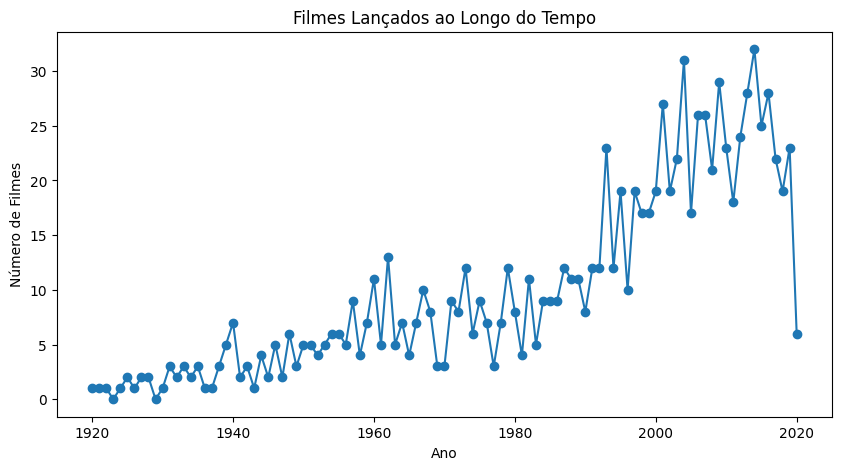

In [28]:
# Movies Released Over Time
raw_df['Released_Year'] = pd.to_numeric(raw_df['Released_Year'], errors='coerce')
year_counts = raw_df['Released_Year'].value_counts().sort_index()
all_years = pd.Series(0, index=range(int(raw_df['Released_Year'].min()), int(raw_df['Released_Year'].max())+1))
year_counts = all_years.add(year_counts, fill_value=0)
# plot
plt.figure(figsize=(10,5))
year_counts.plot(kind="line", marker='o')
plt.title("Filmes Lan√ßados ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("N√∫mero de Filmes")
plt.show()

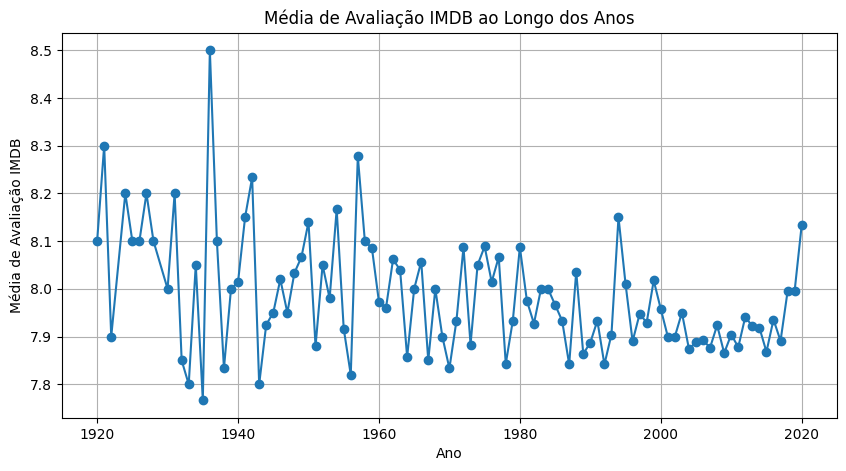

In [27]:
raw_df['Released_Year'] = pd.to_numeric(raw_df['Released_Year'], errors='coerce')
avg_rating = raw_df.groupby("Released_Year")["IMDB_Rating"].mean().reset_index()
avg_rating = avg_rating.sort_values("Released_Year")
plt.figure(figsize=(10,5))
plt.plot(avg_rating['Released_Year'], avg_rating['IMDB_Rating'], marker='o', linestyle='-')
plt.title("M√©dia de Avalia√ß√£o IMDB ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("M√©dia de Avalia√ß√£o IMDB")
plt.grid(True)
plt.show()

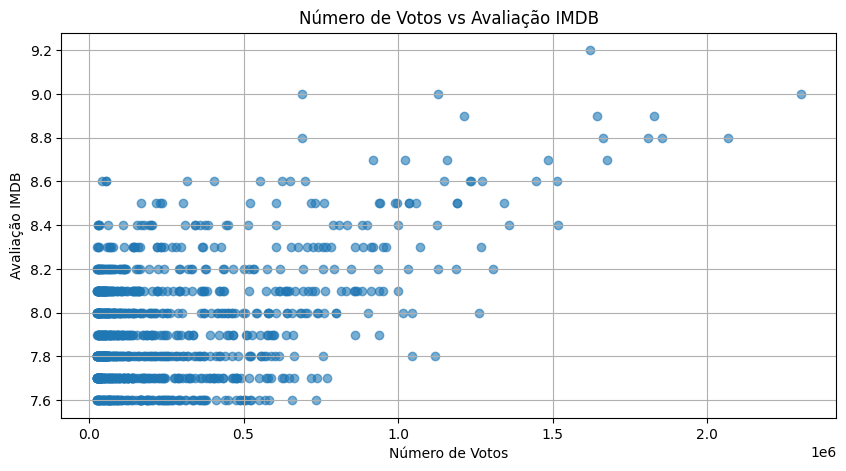

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(raw_df['No_of_Votes'], raw_df['IMDB_Rating'], alpha=0.6)
plt.title("N√∫mero de Votos vs Avalia√ß√£o IMDB")
plt.xlabel("N√∫mero de Votos")
plt.ylabel("Avalia√ß√£o IMDB")
plt.grid(True)
plt.show()

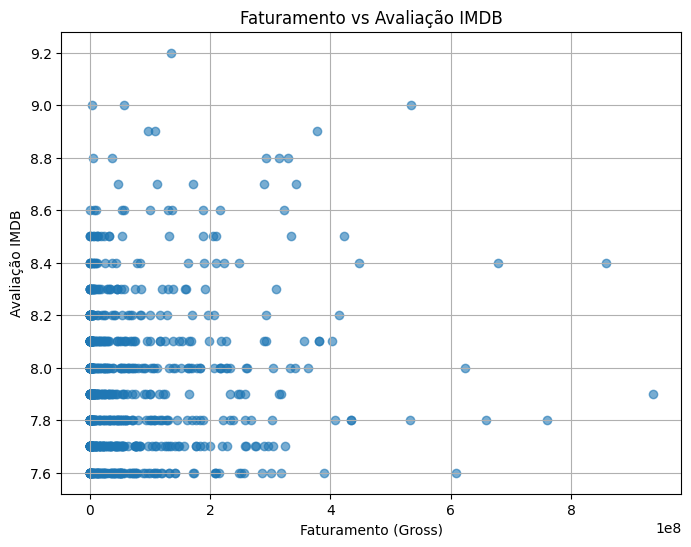

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(raw_df['Gross'], raw_df['IMDB_Rating'], alpha=0.6)
plt.title("Faturamento vs Avalia√ß√£o IMDB")
plt.xlabel("Faturamento (Gross)")
plt.ylabel("Avalia√ß√£o IMDB")
plt.grid(True)
plt.show()

### Correla√ß√£o entre vari√°veis quantitativas

In [ ]:
plot_numeric_correlation(raw_df)

In [16]:
plot_categorical_association(raw_df, alpha= 0.05, top_k = 20)

###  Hip√≥teses 

- H1: Filmes dirigidos por certos diretores ou com determinados atores tendem a ter notas mais altas no IMDB.  
  Observa√ß√£o: Pode ser testado com estat√≠sticas agregadas por diretor e elenco.

- H2: Filmes com maior faturamento (*Gross*) t√™m correla√ß√£o positiva com IMDB Rating.  
  Observa√ß√£o: Correla√ß√£o moderada j√° observada; pode ser confirmada com an√°lise estat√≠stica.

- H3: O n√∫mero de votos (*No_of_Votes*) est√° positivamente relacionado com a nota do IMDB.  
  Observa√ß√£o: Correla√ß√£o baixa-moderada observada; hip√≥tese parcialmente confirmada.

- H4: O ano de lan√ßamento influencia a quantidade de filmes produzidos.  
  Observa√ß√£o: A maioria dos filmes foi produzida entre 2000 e 2019, com pico entre 2010 e 2014. Houve queda em 2020, possivelmente devido √† pandemia.

- H5: O tempo de dura√ß√£o (*Runtime*) dos filmes tende a se concentrar em um intervalo espec√≠fico.  
  Observa√ß√£o: A maioria dos filmes tem dura√ß√£o entre 100 e 130 minutos.

- H6: Certos g√™neros ou certificados podem influenciar a nota m√©dia dos filmes.  
  Observa√ß√£o: Pode ser analisado com teste de qui-quadrado ou ANOVA.


https://www.kaggle.com/code/imaadmahmood/tmdb-dataset-analysis

https://www.kaggle.com/code/alisamy/movie-recommendation-system-using-ml  (sistema de recoemndacao aq)

(nuvens de ponto tbm)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score

# üíæ Select Features and Target
target = "IMDB_Rating"
numeric_features = ["Released_Year", "Runtime", "Meta_score", "No_of_Votes", "Gross"]
categorical_features = ["Certificate", "Genre", "Director"]

X = df[numeric_features + categorical_features]
y = df[target]

# üîß Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", min_frequency=10))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# üß™ Models to Evaluate
models = {
    "RandomForest":  RandomForestRegressor(n_estimators=300, random_state=42),
    "GradientBoost": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

# üîÅ Evaluate with 5-fold CV
print("Cross-Validation Scores (MAE):\n")
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    scores = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_absolute_error")
    print(f"{name:15s} MAE: {-scores.mean():.3f} ¬± {scores.std():.3f}")

# üß† Final Model Train-Test Evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

final_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1))
])

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("\nFinal Model Performance on Test Set:")
print(f"MAE  : {mean_absolute_error(y_test, y_pred):.3f}")
print(f"R2   : {r2_score(y_test, y_pred):.3f}")

In [ ]:
import shap

# üîÑ Re-transform the train data
X_train_transformed = preprocessor.fit_transform(X_train)

# ‚úÖ Use only the trained model inside pipeline
model_trained = final_model.named_steps["model"]

# ‚õî SHAP only works with numpy arrays (ensure type is correct)
X_train_np = X_train_transformed.toarray() if hasattr(X_train_transformed, "toarray") else X_train_transformed

# ‚ö° Create SHAP explainer and compute values
explainer = shap.Explainer(model_trained)
shap_values = explainer(X_train_np)

# üìä Plot SHAP summary bar chart for top features
shap.summary_plot(shap_values, features=X_train_np, feature_names=final_model.named_steps["preprocessor"].get_feature_names_out(), plot_type="bar")

Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Akira Kurosawa      10
Martin Scorsese     10
                    ..
Josh Boone           1
Roberto Benigni      1
James Marsh          1
Paul Haggis          1
James Simone         1
Name: count, Length: 200, dtype: Int64

In [ ]:
step 9A: IMDb Rating vs TMDB Rating
This scatter plot gives us a side-by-side visual of how movies are rated by IMDb users vs TMDB users. It's a quick way to spot consistent hits or polarizing films.

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df_tmdb,
    x="IMDB_Rating",
    y="TMDB_Rating",
    alpha=0.7,
    color="#7dd3fc",
    edgecolor="white"
)
plt.title("IMDb vs TMDB Ratings", fontsize=14)
plt.xlabel("IMDb Rating")
plt.ylabel("TMDB Rating")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
# M√©dia da nota por diretor
mean_ratings = raw_df.groupby('Director')['IMDB_Rating'].mean()

# Combinar com contagem de filmes
director_stats = pd.DataFrame({
    'num_filmes': director_counts,
    'mean_rating': mean_ratings
})

# Correla√ß√£o
print(director_stats.corr())


             num_filmes  mean_rating
num_filmes     1.000000     0.150222
mean_rating    0.150222     1.000000


In [28]:
# Contagem de filmes por diretor
director_counts = raw_df['Director'].value_counts()

# M√©dia de nota por diretor
mean_ratings = raw_df.groupby('Director')['IMDB_Rating'].mean()

# Combinar em um DataFrame
director_stats = pd.DataFrame({
    'num_filmes': director_counts,
    'mean_rating': mean_ratings
}).reset_index().rename(columns={'index': 'Director'})


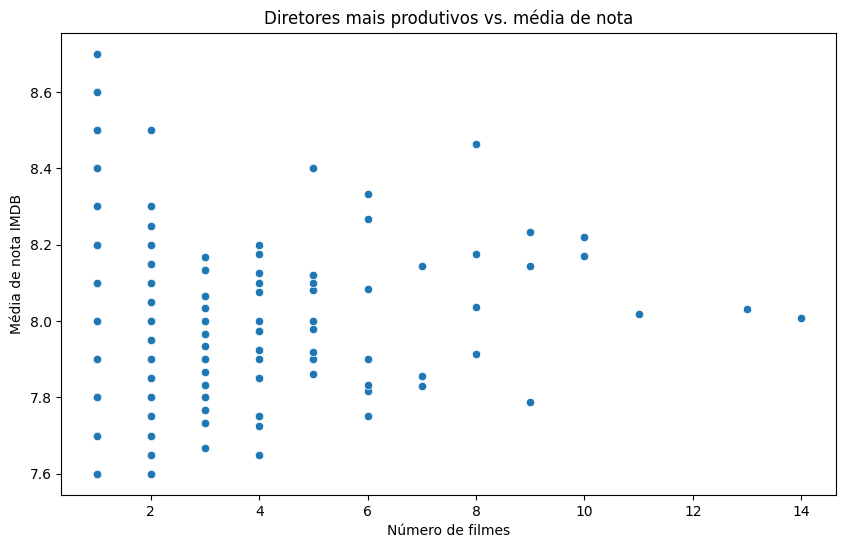

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=director_stats, x='num_filmes', y='mean_rating')
plt.xlabel('N√∫mero de filmes')
plt.ylabel('M√©dia de nota IMDB')
plt.title('Diretores mais produtivos vs. m√©dia de nota')
plt.show()
